In [77]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

X_air = np.linspace(0, 3*np.pi, 75)
Y_air = np.sin(X_air)

X_snow = np.linspace(3*np.pi, 4*np.pi, 50)
Y_snow = np.sin(X_snow)

X = np.concatenate([X_air, X_snow])
Y = np.concatenate([Y_air, Y_snow])

X_air_return = np.linspace(3*np.pi, 0,  75)
Y_air_return = -np.sin(X_air_return)

X_snow_return = np.linspace(4*np.pi, 3*np.pi, 50)
Y_snow_return = -np.sin(X_snow_return)

X = np.concatenate([X, X_snow_return, X_air_return])
Y = np.concatenate([Y, Y_snow_return, Y_air_return])

fig, ax = plt.subplots(1,1)
ax.set_xlim([0, 4*np.pi])
ax.set_ylim([-1.1, 1.1])
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylabel('Transmitter / Receiver')
axx = ax.twinx()
axx.set_ylabel('Ground')
axx.set_yticks([])
ax.axvspan(3*np.pi, 4*np.pi, alpha = 0.4, label = 'snow')
ax.annotate('Snow',
            xy=(2, 1), xycoords='data',
            xytext=(0.87, 0.9), textcoords='axes fraction',
            horizontalalignment='center', verticalalignment='top')

# ax.legend(loc = 'upper left')
sinegraph, = ax.plot([], [])
dot, = ax.plot([], [], 'o', color='red')

ax.set_title('Image Acquisition 1')
plt.tight_layout()
def sine(i):
    if i > 125:
        sinegraph.set_data(X[125:i],Y[125:i])
    else:
        sinegraph.set_data(X[:i],Y[:i])
    dot.set_data(X[i],Y[i])

anim = animation.FuncAnimation(fig, sine, frames=len(X), interval=35, repeat = False)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html) 

# To save the animation using Pillow as a gif
writer = animation.PillowWriter(fps=15,
                                metadata=dict(artist='Zach Hoppinen'),
                                bitrate=1800)
anim.save('fig1_insar.gif', writer=writer)
plt.close()

/var/folders/hn/hd92_2tj7rj8xghqt1qf0nhr2p1n49/T/ipykernel_50685/2064532380.py:49: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  dot.set_data(X[i],Y[i])


/var/folders/hn/hd92_2tj7rj8xghqt1qf0nhr2p1n49/T/ipykernel_50685/2064532380.py:49: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  dot.set_data(X[i],Y[i])


In [109]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

ground = 4*np.pi
sd = 3*np.pi
n = 250
snow_n = int(n/2*(1- sd/ground) * 6/4)
air_n = int(n/2 - snow_n)
X_air = np.linspace(0, sd, air_n)
Y_air = np.sin(X_air)

X_snow = np.linspace(sd, 4*np.pi, snow_n)
Y_snow = np.sin(X_snow)

X = np.concatenate([X_air, X_snow])
Y = np.concatenate([Y_air, Y_snow])

X_air_return = np.linspace(sd, 0, air_n)
Y_air_return = -np.sin(X_air_return)

X_snow_return = np.linspace(4*np.pi, sd, snow_n)
Y_snow_return = -np.sin(X_snow_return)

X = np.concatenate([X, X_snow_return, X_air_return])
Y = np.concatenate([Y, Y_snow_return, Y_air_return])

fig, ax = plt.subplots(1,1)
ax.set_xlim([0, 4*np.pi])
ax.set_ylim([-1.1, 1.1])
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylabel('Transmitter / Receiver')
axx = ax.twinx()
axx.set_ylabel('Ground')
axx.set_yticks([])
ax.axvspan(sd, 4*np.pi, alpha = 0.4, label = 'snow')
ax.annotate('Snow',
            xy=(2, 1), xycoords='data',
            xytext=(0.87, 0.9), textcoords='axes fraction',
            horizontalalignment='center', verticalalignment='top')

# ax.legend(loc = 'upper left')
sinegraph, = ax.plot([], [])
dot, = ax.plot([], [], 'o', color='red')

ax.set_title('Image Acquisition 1')
plt.tight_layout()
def sine(i):
    if i > int(n/2):
        sinegraph.set_data(X[int(n/2):i],Y[int(n/2):i])
    else:
        sinegraph.set_data(X[:i],Y[:i])
    dot.set_data(X[i],Y[i])

anim = animation.FuncAnimation(fig, sine, frames=len(X), interval=35, repeat = False)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html) 

# To save the animation using Pillow as a gif
writer = animation.PillowWriter(fps=15,
                                metadata=dict(artist='Zach Hoppinen'),
                                bitrate=1800)
anim.save('fig1_insar.gif', writer=writer)
plt.close()

/var/folders/hn/hd92_2tj7rj8xghqt1qf0nhr2p1n49/T/ipykernel_50685/1059409797.py:54: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  dot.set_data(X[i],Y[i])


/var/folders/hn/hd92_2tj7rj8xghqt1qf0nhr2p1n49/T/ipykernel_50685/1059409797.py:54: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  dot.set_data(X[i],Y[i])


In [2]:
# def phase_shift(x, A, B, C, D):
    # return A* np.sin(B * x - C) + D
from scipy.linalg import norm
from math import acos
def iso_freq_phase_diff(s1, s2):
    phase_diff = acos( np.dot(s1,s2) / (norm(s1)*norm(s2)) )
    return phase_diff

def intersection(b1, b2, x, c1 = 0):
    c2 = b2*x - b1*x + c1
    return c2

def generate_XY(sd, ground = 8*np.pi, n = 500, freq_change = 2):
    # air_n = int(n/2 * (1 - sd/ground))
    # snow_n = int(n/2 - air_n)
    step = (ground*2)/n
    step_snow = step

    # X_air = np.linspace(0, sd, air_n)
    X_air = np.arange(0, sd, step)
    Y_air = np.sin(X_air)

    # X_snow = np.linspace(sd, ground, snow_n)
    X_snow = np.arange(sd, ground, step_snow)
    Y_snow = np.sin(X_snow * freq_change - intersection(1, freq_change, sd))

    # X_snow_return = np.linspace(ground, sd, snow_n)
    X_snow_return = np.arange(ground, sd, -step_snow)
    Y_snow_return = np.sin(np.arange(ground, ground + (ground - sd), step_snow) * freq_change - intersection(1, freq_change, sd))

    # X_air_return = np.linspace(sd, 0, air_n)
    X_air_return = np.arange(start = sd, stop = 0, step = -step)
    Y_air_return = np.sin(np.arange(ground + (ground - sd), 2 * ground, step) - intersection(freq_change, 1, ground + (ground - sd), intersection(1, freq_change, sd)))

    X = np.concatenate([X_air, X_snow, X_snow_return, X_air_return])
    Y = np.concatenate([Y_air, Y_snow, Y_snow_return, Y_air_return])

    return X, Y

In [430]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
sd1, sd2 = 6*np.pi, 5.25*np.pi
ground = 8*np.pi
n1, n2 = 500, 520
full = 800
X, Y = generate_XY(sd = sd1, n = n1)
X2, Y2 = generate_XY(sd = sd2, n = n2)
X = np.pad(X, (0, full), 'constant')
Y = np.pad(Y, (0, full), 'constant')
X2 = np.pad(X2, (0, full), 'constant')
Y2 = np.pad(Y2, (0, full), 'constant')

fig, axes = plt.subplots(2, 1, figsize = (12, 8))
for ax in axes:
    ax.set_xlim([0, ground])
    ax.set_ylim([-1.1, 1.1])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylabel('Transmitter / Receiver')
    axx = ax.twinx()
    axx.set_ylabel('Ground')
    axx.set_yticks([])
    ax.annotate('Snow',
            xy=(2, 1), xycoords='data',
            xytext=(0.87, 0.9), textcoords='axes fraction',
            horizontalalignment='center', verticalalignment='top')


axes[0].axvspan(sd1, ground, alpha = 0.4, label = 'snow')
axes[1].axvspan(sd2, ground, alpha = 0.4, label = 'snow')


axes[0].set_title('Image Acquisition 1')
axes[1].set_title('Image Acquisition 2')

def flatten_comprehension(matrix):
    return [item for row in matrix for item in row]


sinegraphs = flatten_comprehension([ax.plot([], []) for ax in axes])
dots = flatten_comprehension([ax.plot([], [], 'o', color='red') for ax in axes])

plt.tight_layout()

def sine(i):
    if i > int(n2/2):
        sinegraphs[1].set_data(X2[int(n2/2):i],Y2[int(n2/2):i])
    else:
        sinegraphs[1].set_data(X2[:i],Y2[:i])

    if i > int(n1/2):
        sinegraphs[0].set_data(X[int(n1/2):i],Y[int(n1/2):i])
    else:
        sinegraphs[0].set_data(X[:i],Y[:i])

    if i <= n1: 
        dots[0].set_data([X[i]],[Y[i]])
    if i <= n2:
        dots[1].set_data([X2[i]], [Y2[i]])

anim = animation.FuncAnimation(fig, sine, frames=len(X2), interval=35, repeat = True)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html) 

# To save the animation using Pillow as a gif
writer = animation.PillowWriter(fps=15,
                                metadata=dict(artist='Zach Hoppinen'),
                                bitrate=1800)
anim.save('insar_conceputal_figure.gif', writer=writer)
plt.close()

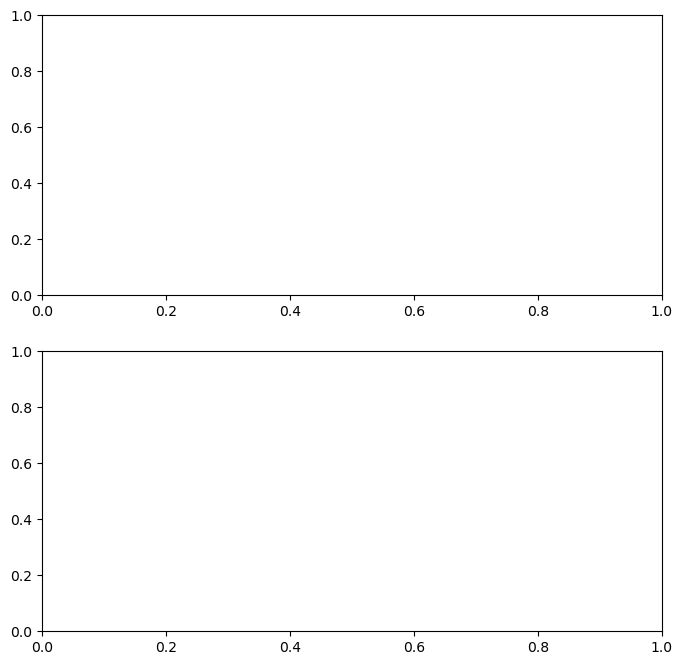

In [433]:
fig, axes = plt.subplots(2, 1, figsize = (8, 8))


In [4]:
from IPython import display

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
sd1, sd2 = 5.25*np.pi, 6*np.pi
ground = 8*np.pi
n1, n2 = 530, 500
full = 800
X, Y = generate_XY(sd = sd1, n = n1)
X2, Y2 = generate_XY(sd = sd2, n = n2)
X = np.pad(X, (0, full), 'constant')
Y = np.pad(Y, (0, full), 'constant')
X2 = np.pad(X2, (0, full), 'constant')
Y2 = np.pad(Y2, (0, full), 'constant')

fig, axes = plt.subplots(2, 1, figsize = (8, 8))
for ax in axes:
    ax.set_xlim([0, ground])
    ax.set_ylim([-1.1, 1.1])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylabel('Transmitter / Receiver')
    axx = ax.twinx()
    axx.set_ylabel('Ground')
    axx.set_yticks([])
    ax.annotate('Snow',
            xy=(2, 1), xycoords='data',
            xytext=(0.87, 0.9), textcoords='axes fraction',
            horizontalalignment='center', verticalalignment='top', rotation = 90)


axes[0].axvspan(sd1, ground, alpha = 0.4, label = 'snow')
axes[1].axvspan(sd2, ground, alpha = 0.4, label = 'snow')

axes[0].set_ylabel('Acquisition 2\nTransmitter /  Receiver')
axes[1].set_ylabel('Acquisition 1\nTransmitter /  Receiver')

# axes[0].set_title('Image Acquisition 1')
# axes[1].set_title('Image Acquisition 2')

def flatten_comprehension(matrix):
    return [item for row in matrix for item in row]


sinegraphs = flatten_comprehension([ax.plot([], []) for ax in axes])
dots = flatten_comprehension([ax.plot([], [], 'o', color='red') for ax in axes])

plt.tight_layout()

def sine(i):
    if i > int(n2/2):
        sinegraphs[1].set_data(X2[int(n2/2):i],Y2[int(n2/2):i])
    else:
        sinegraphs[1].set_data(X2[:i],Y2[:i])

    if i > int(n1/2):
        sinegraphs[0].set_data(X[int(n1/2):i],Y[int(n1/2):i])
    else:
        sinegraphs[0].set_data(X[:i],Y[:i])

    if i <= n1: 
        dots[0].set_data([X[i]],[Y[i]])
    if i <= n2:
        dots[1].set_data([X2[i]], [Y2[i]])

anim = animation.FuncAnimation(fig, sine, frames=len(X2), interval=35, repeat = True)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html) 

# To save the animation using Pillow as a gif
writer = animation.PillowWriter(fps=15,
                                metadata=dict(artist='Zach Hoppinen'),
                                bitrate=1800)
anim.save('insar_conceputal_figure_vert.gif', writer=writer)
plt.close()